<a href="https://colab.research.google.com/github/Go-Sungkyun/For-portfolio/blob/main/%EC%BA%90%EA%B8%80%EB%9F%AC_%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 실습은 부스트코스의 '캐글 실습으로 배운느 데이터 사이언스'의 설문조사 분석과 시각화 부분임.

# 데이터 로드

In [ ]:
from google.colab import files
myfile = files.upload()

구글 코랩에서 컴퓨터 드라이브 내 파일을 로드하기 위해서 직접 업로드 해줘야함.
다른 방법으로 구글 드라이브에 업로드한 파일을 불러올수도 있음.

In [2]:
#구글 드라이브 연동하기
#구글 드라이브에 데이터를 올린 후 사용할 경우에만 실행
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
question = pd.read_csv('/content/drive/My Drive/data/kaggle_DS_FAQ/schema.csv')
question.shape

(290, 3)

In [ ]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
mcq = pd.read_csv('/content/drive/My Drive/data/kaggle_DS_FAQ/multipleChoiceResponses.csv',
                  encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [ ]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [ ]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

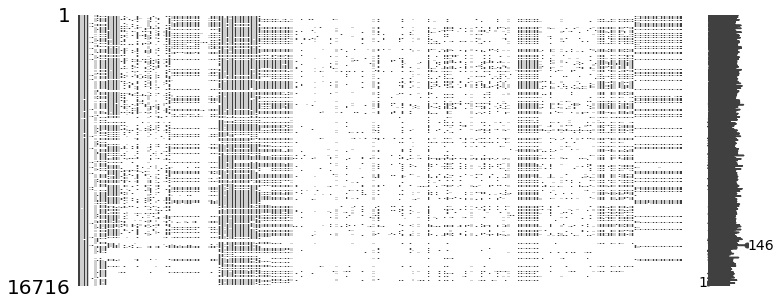

In [ ]:
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

# 설문통계

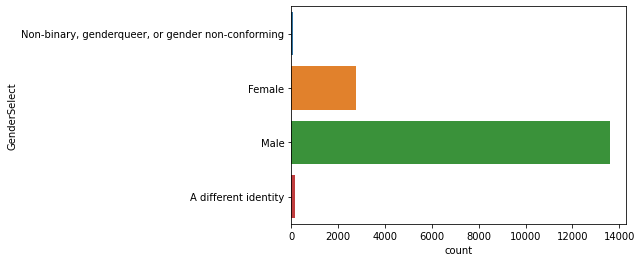

In [ ]:
sns.countplot(y='GenderSelect',data=mcq)

남성이 압도적으로 많다. 

In [ ]:
nation = pd.DataFrame(mcq['Country'].value_counts())
nation['국가'] = nation.index
nation.columns = ['응답 수' ,'국가']
nation=nation.reset_index().drop('index',axis=1)
nation.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


응답자 수를 기준으로 보았을 때 미국이 가장 많고 한국의 경우 194명으로 17위를 기록하였다.

In [ ]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

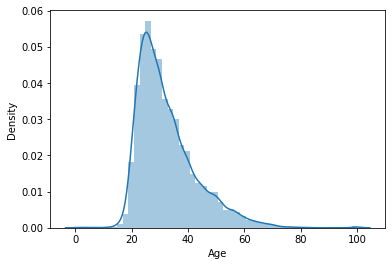

In [ ]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

나이 평균은 32.37세이며, 20대부터 증가하다가 30대에서 피크를 40대 부터 줄어드는 양상을 보인다.

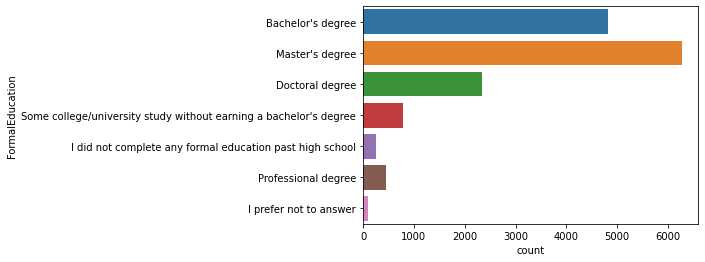

In [ ]:
sns.countplot(y='FormalEducation',data=mcq)

In [ ]:
pd.DataFrame(mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


In [ ]:
mcq_major =pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent =pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df =mcq_major.merge(mcq_major_percent,left_index=True,
                              right_index=True)
mcq_major_df.columns=['응답 수','비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


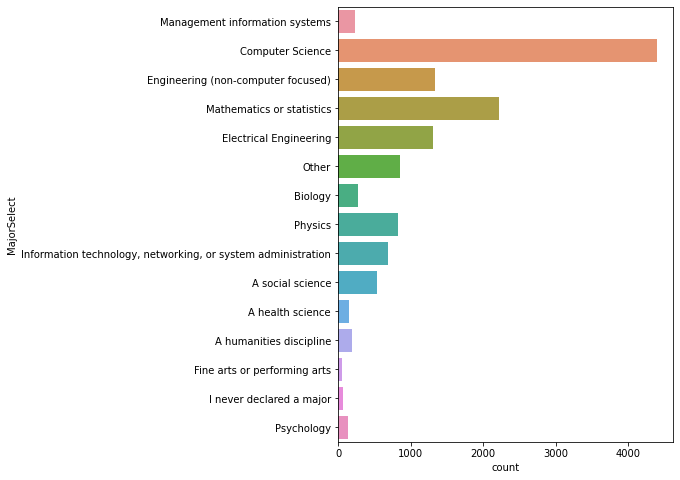

In [ ]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect',data=mcq)

석사 학위가 가장 많았으며, 전공을 기준으로 하였을 때 컴공과 그 다음으로 수학 및 통계학과가 나왔다.

In [ ]:
mcq_es_count =pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent =pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent,left_index=True,
                               right_index=True)
mcq_es_df.columns = ['응답 수','비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


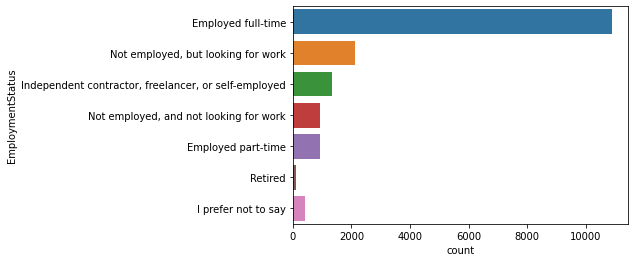

In [ ]:
sns.countplot(y='EmploymentStatus',data=mcq)

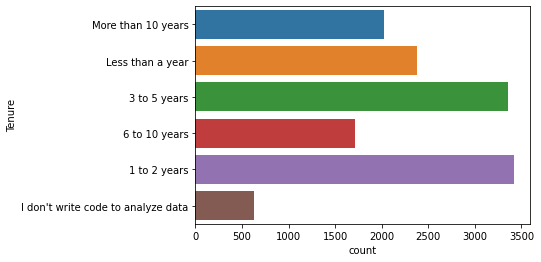

In [ ]:
sns.countplot(y='Tenure',data=mcq)

재직 상태를 볼 때, 재직자가 압도적으로 많으며 그 다음로 구직자가 많은 양상을 보인다.
코딩 경력을 볼때 1\~2년차와 3~5년차가 제일 많았고 1년 미만이 그 뒤를 이었다. 

한국인 인터뷰어의 수: 194


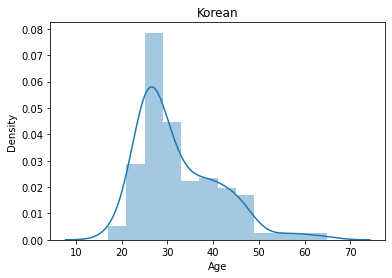

In [ ]:
kor =mcq.loc[(mcq['Country']=='South Korea')]
print('한국인 인터뷰어의 수: ' + str(kor.shape[0]))

sns.distplot(kor['Age'].dropna())
plt.title('Korean')
plt.show()

In [ ]:
pd.DataFrame(kor['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

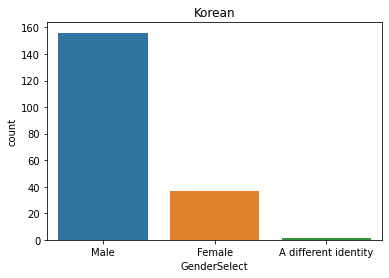

In [ ]:
sns.countplot(x='GenderSelect',data=kor)
plt.title('Korean')

Text(0.5, 1.0, 'korean male')

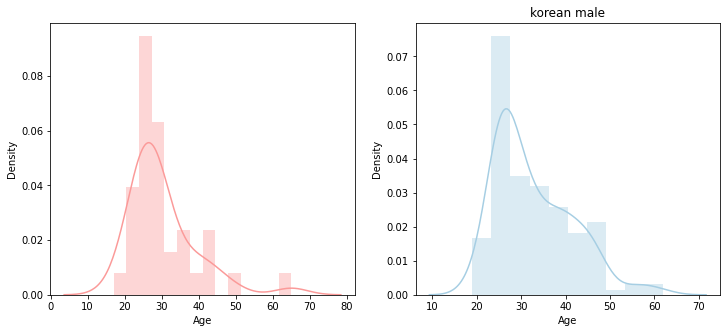

In [ ]:
figure, (ax1,ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(kor['Age'].loc[kor['GenderSelect']=='Female'].dropna(),
             norm_hist=False,color=sns.color_palette("Paired")[4],ax=ax1)
plt.title('korean female')

sns.distplot(kor['Age'].loc[kor['GenderSelect']=='Male'].dropna(),
             norm_hist=False,color=sns.color_palette("Paired")[0],ax=ax2)
plt.title('korean male')

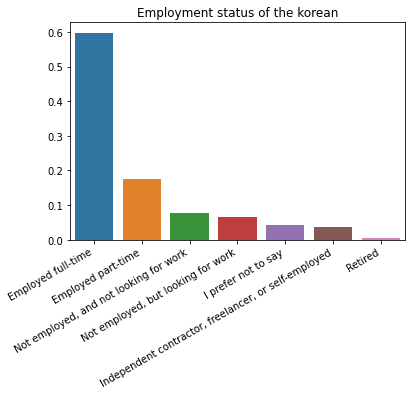

In [ ]:
sns.barplot(x=kor['EmploymentStatus'].unique(),y=kor['EmploymentStatus'].
            value_counts()/len(kor))
plt.xticks(rotation=30,ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

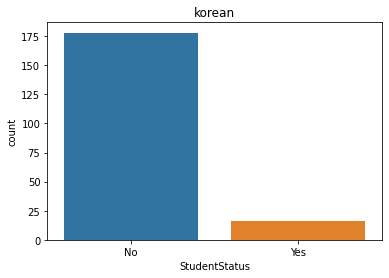

In [ ]:
kor['StudentStatus']=kor['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus',data=kor)
plt.title('korean')
plt.show()

In [ ]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


한국인만을 따로 살펴보았을 때 역시 전체적인 양상을 유사하다.

# Q. Python과 R 중 어떤 언어를 배워햐 할까?

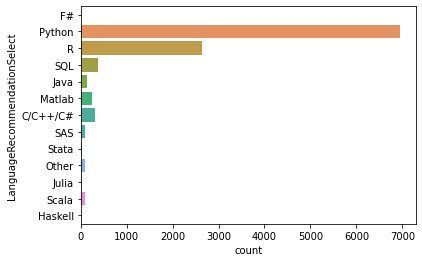

In [ ]:
sns.countplot(y='LanguageRecommendationSelect',data=mcq)

파이썬이 압도적으로 많고 그 다음 R, SQL이 뒤를 이었다. 

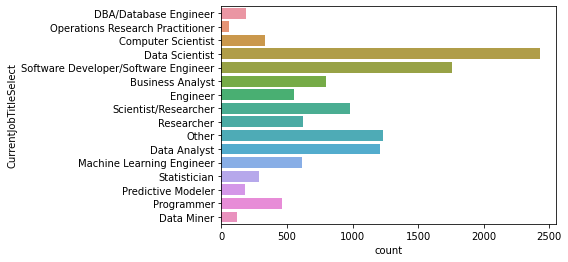

In [ ]:
sns.countplot(y=mcq['CurrentJobTitleSelect'])

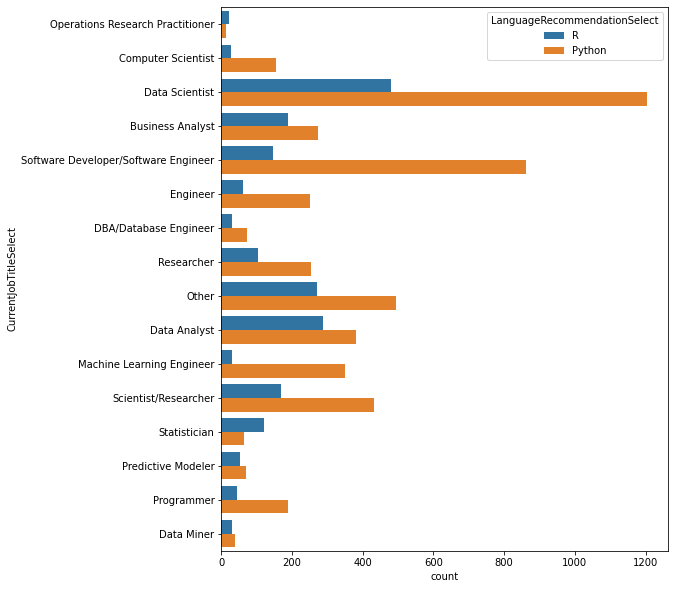

In [ ]:
data=mcq[(mcq['CurrentJobTitleSelect'].notnull() &
          (mcq['LanguageRecommendationSelect']=='Python')|
          (mcq['LanguageRecommendationSelect']=='R'))]
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect',
              hue='LanguageRecommendationSelect',
              data=data)


통계학자와 오퍼레이션 리서쳐를 제외하면 압도적으로 파이썬 이용자가 많았다.

In [ ]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(
    normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답수','비율']
mcq_ml_tool_df

,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


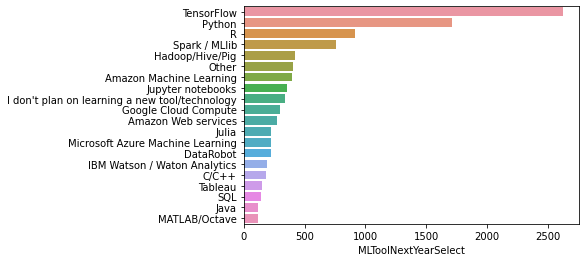

In [ ]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

내년에 주목할 머신러닝 툴로서 텐서플로우 응답자가 23% 정도로 가장 많았다. 

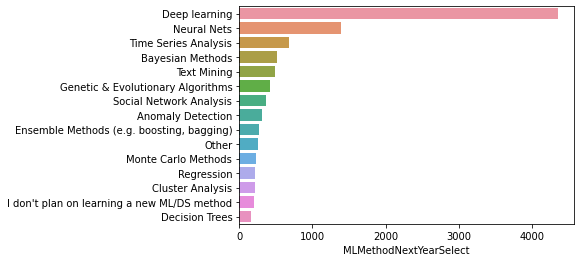

In [ ]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

머신러닝 기법으로는 딥러닝이 가장 많이 뽑혔다

# Q. 어디서 데이터 사이언스를 배워야 할까?

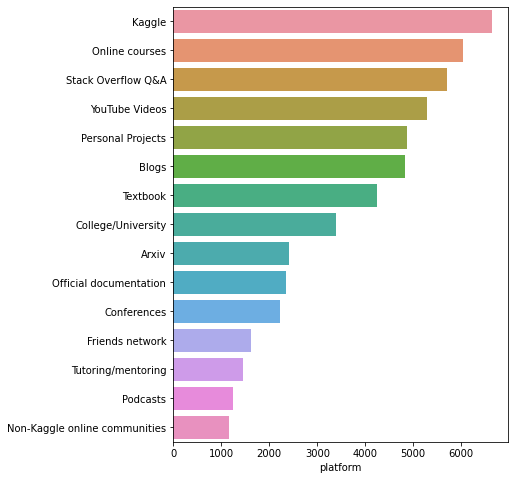

In [ ]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype(
    'str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

Kaggle이 가장 인기있는 학습 플랫폼으로 뽑혔으며, 그 다음으로 온라인 코스, 스택 오버플로우, 유튜브 등이 뒤를 이었다. 


In [ ]:
qc = question.loc[question[
    'Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


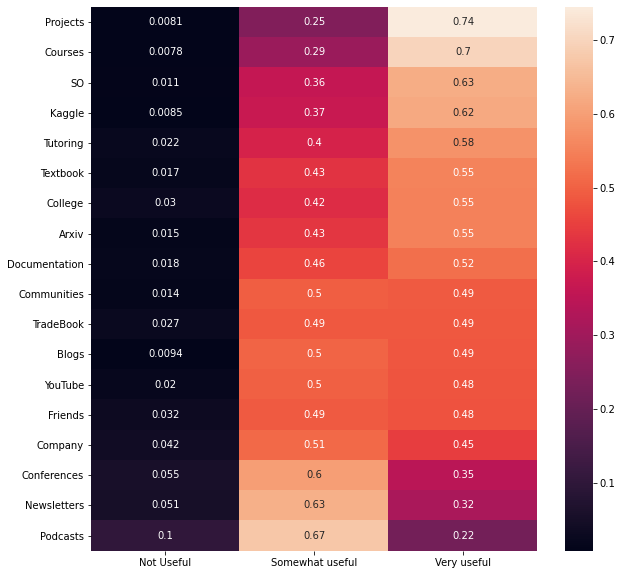

In [ ]:
use_features = [x for x in mcq.columns if x.find(
    'LearningPlatformUsefulness') != -1]


fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

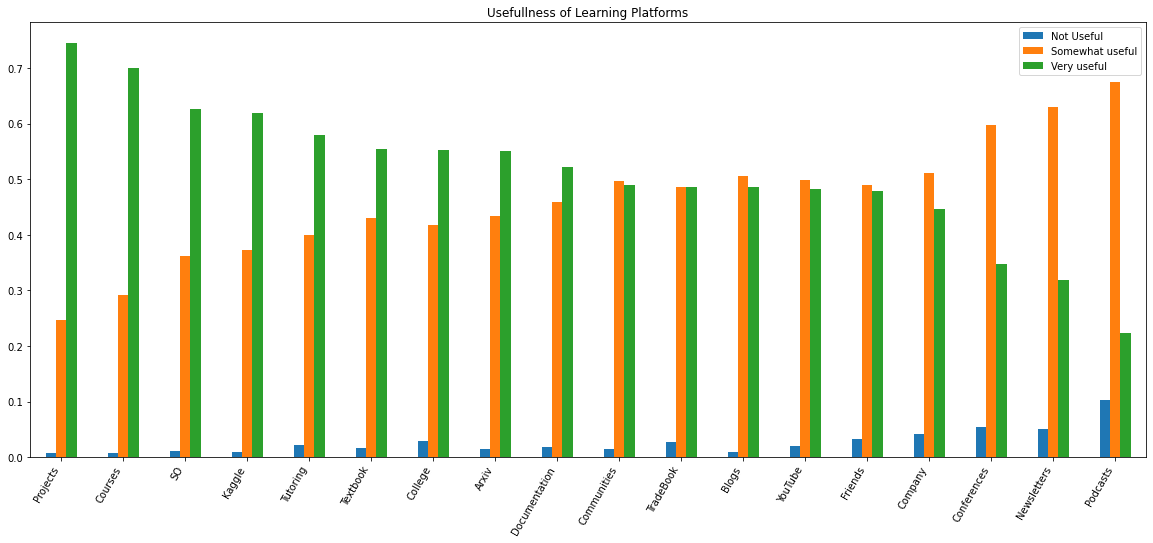

In [ ]:
fdf.plot(kind='bar', figsize=(20,8),
         title="Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha='right')

학습 플랫폼이 유용했냐는 질문에 프로젝트 긍정도가 가장 높았다. 역시 실습이 배우는데 가장 도움이 된다.

In [ ]:
cat_features = [x for x in mcq.columns if x.find(
    'LearningCategory') != -1]

cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

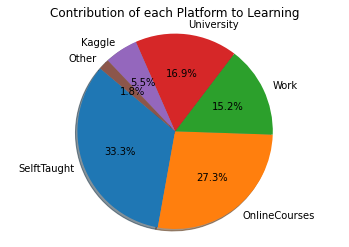

In [ ]:
plt.pie(cdf, labels=cdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인프로젝트가 33%를 차지해 가장 도움이 되는 것을 파이차트로 확인 가능하다. 그 다음으로 온라인 코스, 업무, 대학이 그 뒤를 이었다.

# Q. 데이터 사이언스 공부에 얼마나 시간을 보내는가?

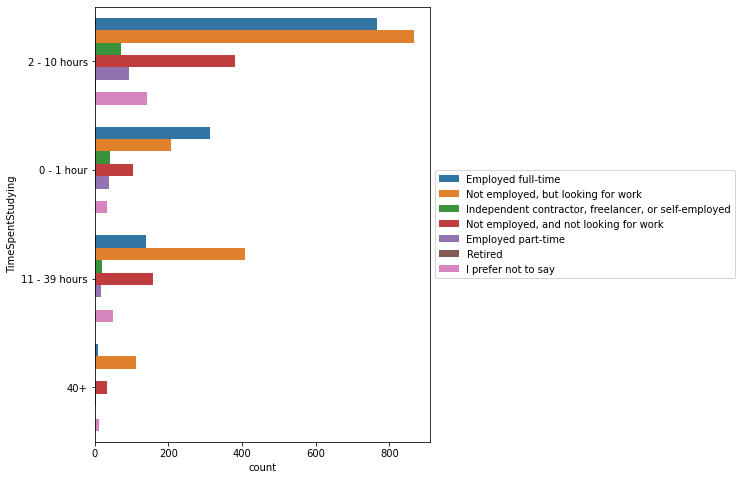

In [ ]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', 
              data=mcq, 
              hue='EmploymentStatus'
             ).legend(loc='center left',
                      bbox_to_anchor=(1, 0.5))

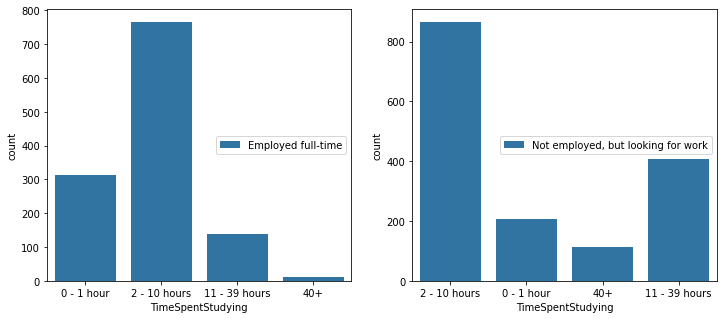

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying', 
              data=looking_for_job, 
              hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',
                      bbox_to_anchor=(1, 0.5))

재직자의 경우 2\~10시간이 가장 많다. 구직자의 경우 역시 2\~10시간 많으나, 11~39시간 역시 많은 응답을 받았다.

# Q. 추천할 만한 학습 루트가 있는지?

In [7]:
mcq['BlogsPodcastsNewslettersSelect']=mcq['BlogsPodcastsNewslettersSelect'].astype(
    'str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [8]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1,drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [9]:
s=s[s !='nan'].value_counts().head(20)

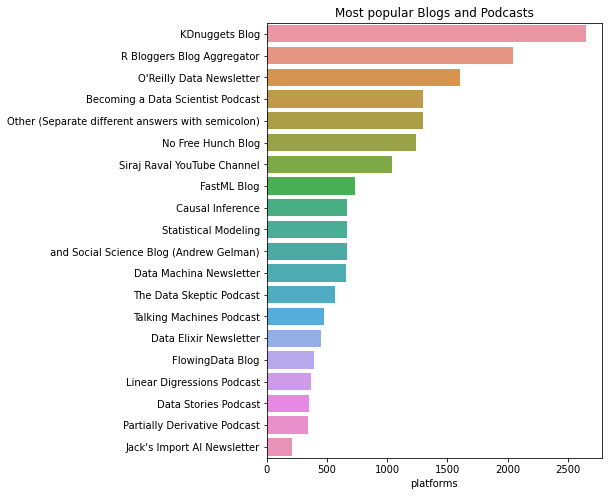

In [11]:
plt.figure(figsize=(6,8))
plt.title("Most popular Blogs and Podcasts")
sns.barplot(y=s.index,x=s)

KDnuggets라는 블로그에서 가장 많은 정보를 얻고 있으며 그 다음으로 R Bloggers Blog Aggregator와 O'Reilly Data Newsletter가 유용하다고 투표를 받았다. 

In [13]:
mcq['CoursePlatformSelect']=mcq[
  'CoursePlatformSelect'].astype('str').apply(
      lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

# Q. 데이터 사이언스 직무에 가장 필요한 스킬은?

# Q. 학습용 데이터를 어디서 얻는지?

### Q. 개인 프로젝트에서 가장 어려운 것은?

# Q. 데이터 사이언스 업무에서 가장 필요한 일은?

# 새 섹션

# 새 섹션

# 새 섹션

# 새 섹션

# Q. 빅데이터 분야에서 크게 주목받을 것은?

In [ ]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml

# Q.데이터사이언스의 고려 요소

In [ ]:
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [ ]:
job_factors=[x for x in mcq.columns if x.find('JobFactor') != -1]

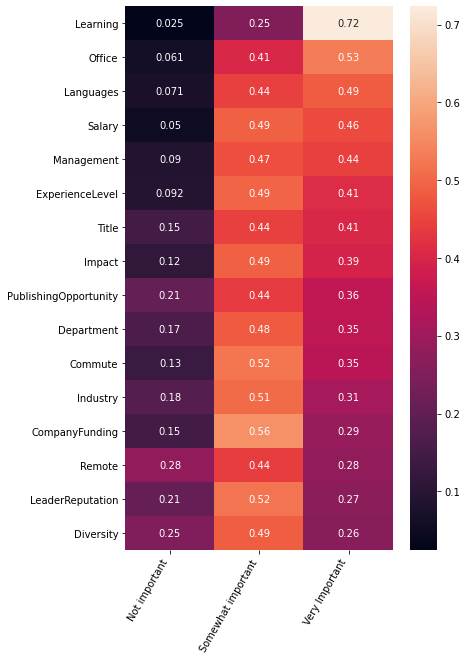

In [ ]:
jfdf={}
for feature in job_factors:
  a=mcq[feature].value_counts()
  a=a/a.sum()
  jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60,ha='right')
sns.heatmap(jfdf.sort_values('Very Important',ascending=False),annot=True)

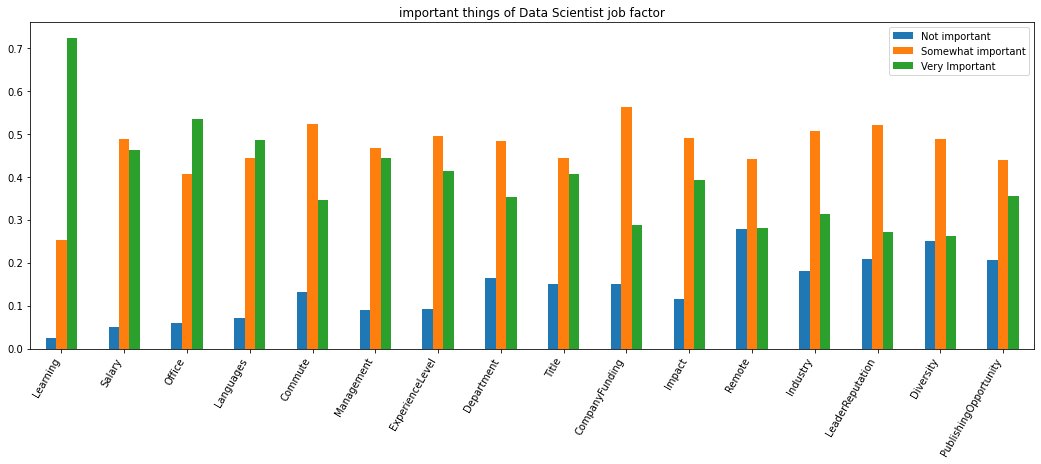

In [ ]:
jfdf.plot(kind='bar',figsize=(18,6),title="important things of Data Scientist job factor")
plt.xticks(rotation=60,ha='right')
plt.show()

밝을수록 높은 응답을 의미한다. 직업 요소로 가장 중요한 것은 Learning 즉 배움이라는 응답이 72%나 받아 압도적이다. 
bar플롯을 그려서도 확인 가능하다. 

# Q. 데이터 사이언티스트는 학위가 중요할까?

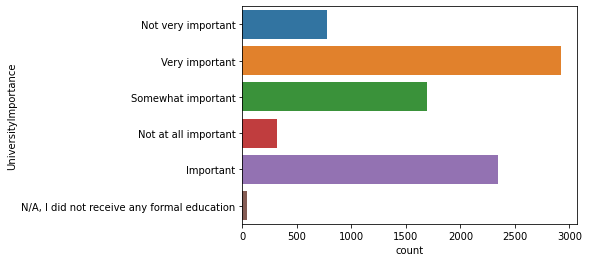

In [ ]:
sns.countplot(y='UniversityImportance',data=mcq)

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist,group_labels)
py.iplot(fig, filename='University Importance by Age')